In [315]:
#import keras essentials and stuff
import tensorflow as tf
import matplotlib.pyplot as plt


# Making a neural net
---
the neural net takes two input variables for now 
the genre(as one bit encoded) and a historical event (i.e second world war, vietnam war, etc).

genres are labeled as follow:

- 1	&nbsp;&nbsp;  Musical
- 2	&nbsp;&nbsp; War
- 3	&nbsp;&nbsp; Romance
- 4	&nbsp;&nbsp; Family
- 5	&nbsp;&nbsp; Comedy
- 6	&nbsp;&nbsp; Animation
- 7	&nbsp;&nbsp; Western
- 8	&nbsp;&nbsp; Sci-Fi
- 9	&nbsp;&nbsp; Short
- 10&nbsp;&nbsp; 	Action
- 11&nbsp;&nbsp; 	Biography
- 12&nbsp;&nbsp; 	History
- 13&nbsp;&nbsp; 	Crime
- 14&nbsp;&nbsp; 	Music
- 15&nbsp;&nbsp; 	Fantasy
- 16&nbsp;&nbsp; 	Horror
- 17&nbsp;&nbsp; 	Drama
- 18&nbsp;&nbsp; 	Thriller
- 19&nbsp;&nbsp; 	Adventure
- 20&nbsp;&nbsp; 	Documentary
- 21&nbsp;&nbsp; 	Mystery

and historical events are labeled as:
- second world war  = 1
- vietnam war       = 2

this spits out a release year based on genre

# Preprocessing
---
preprocessing the data is necessary to make it suitable for the neural network

In [316]:
# import neccessary stuff 
#run this from the datascience-films folder
import pandas as pd 
import numpy as np
from pathlib import Path
import openpyxl

RESOURCE_PATH = Path('../cleaned_data')

df= pd.read_csv(RESOURCE_PATH / 'historical_war_movies.csv',sep=',')

df.head()

,primaryTitle,movie_release_year,event_year,EVENTID,genres,SUMMARY,plot,numVotes,averageRating,historical_event,COUNTRY,CITY
0,Secret City,2012.0,2012-07-18,6-244,Documentary,The decision of President Abdelaziz Bouteflika...,Political journalist Harriet Dunkley sees the...,48.0,6.4,NaN,Algeria,Algiers
1,Secret City,2012.0,2011-02-12,6-238,Documentary,The pro-democracy protest movement that had ga...,Political journalist Harriet Dunkley sees the...,48.0,6.4,NaN,Algeria,Algiers
2,Secret City,2012.0,2012-07-09,6-243,Documentary,The decision of President Abdelaziz Bouteflika...,Political journalist Harriet Dunkley sees the...,48.0,6.4,NaN,Algeria,Algiers
3,The Walking Dead,1995.0,1995-08-31,6-187,"Action,Drama,War",...a car driven by a suicide bomber exploded o...,Rick Grimes is a former Sheriff's deputy who ...,819.0,4.9,NaN,Algeria,Algiers
4,Secret City,2012.0,2011-08-17,8-55,Documentary,"…members of the Islamic Action Front (IAF), th...",Political journalist Harriet Dunkley sees the...,48.0,6.4,NaN,Jordan,Amman


In [317]:
df['numVotes'] = df['numVotes'].fillna(0)
#lastly pop our target we want
# df['target'] = list(zip(df.movie_release_year, df.averageRating))
target = df[['movie_release_year','averageRating']]
# fill target NA values in as a rating of 1
# TODO: this brings the predicted rating down.
target.averageRating =  target.averageRating.fillna(1)

target

/home/shivan/school/jaar_4/datascience-films/env/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,movie_release_year,averageRating
0,2012.0,6.4
1,2012.0,6.4
2,2012.0,6.4
3,1995.0,4.9
4,2012.0,6.4
...,...,...
402,1980.0,3.0
403,1974.0,2.5
404,1974.0,2.5
405,1974.0,2.5


In [318]:
# split genres per genre and create column per genre
unique_genres = pd.unique(df["genres"].str.split(",", expand=True).stack())
df = df.join(df.pop('genres').str.get_dummies(sep=',').astype(bool))
df

,primaryTitle,movie_release_year,event_year,EVENTID,SUMMARY,plot,numVotes,averageRating,historical_event,COUNTRY,...,Documentary,Drama,Family,History,News,Romance,Short,Sport,Thriller,War
0,Secret City,2012.0,2012-07-18,6-244,The decision of President Abdelaziz Bouteflika...,Political journalist Harriet Dunkley sees the...,48.0,6.4,NaN,Algeria,...,True,False,False,False,False,False,False,False,False,False
1,Secret City,2012.0,2011-02-12,6-238,The pro-democracy protest movement that had ga...,Political journalist Harriet Dunkley sees the...,48.0,6.4,NaN,Algeria,...,True,False,False,False,False,False,False,False,False,False
2,Secret City,2012.0,2012-07-09,6-243,The decision of President Abdelaziz Bouteflika...,Political journalist Harriet Dunkley sees the...,48.0,6.4,NaN,Algeria,...,True,False,False,False,False,False,False,False,False,False
3,The Walking Dead,1995.0,1995-08-31,6-187,...a car driven by a suicide bomber exploded o...,Rick Grimes is a former Sheriff's deputy who ...,819.0,4.9,NaN,Algeria,...,False,True,False,False,False,False,False,False,False,True
4,Secret City,2012.0,2011-08-17,8-55,"…members of the Islamic Action Front (IAF), th...",Political journalist Harriet Dunkley sees the...,48.0,6.4,NaN,Jordan,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,The Last Hunter (1980),1980.0,1979-11-21,35-35,"(ii) in , despite a ban on demonstrations, a l...","Set in 1973, a US officer goes on a dangerous ...",2.0,3.0,vietnam war,Bangladesh,...,False,False,False,False,False,False,False,False,True,True
403,There Is No 13 (1974),1974.0,1974-10-31,82-128,...the agitation continued and led to serious ...,Surrealist cinema based film involving a young...,1.0,2.5,vietnam war,Vietnam,...,False,True,False,False,False,False,False,False,False,True
404,There Is No 13 (1974),1974.0,1974-09-20,82-126,"Three newspapers, Dai Dan Toc, Dien Tin and S...",Surrealist cinema based film involving a young...,1.0,2.5,vietnam war,Vietnam,...,False,True,False,False,False,False,False,False,False,True
405,There Is No 13 (1974),1974.0,1974-10-20,82-127,"About 4,000 Catholics took part in a demonstra...",Surrealist cinema based film involving a young...,1.0,2.5,vietnam war,Vietnam,...,False,True,False,False,False,False,False,False,False,True


In [319]:
#get test data for input

# get numeric features and set as target
numeric_feature_names = ['numVotes'] + list(unique_genres)
numeric_features = df[numeric_feature_names]
numeric_features['numVotes'] = numeric_features['numVotes'].fillna(0)
numeric_features['numVotes'] = numeric_features['numVotes'].astype(np.int64)


numeric_features.head()





/tmp/ipykernel_1564/2473375833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_features['numVotes'] = numeric_features['numVotes'].fillna(0)
/tmp/ipykernel_1564/2473375833.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_features['numVotes'] = numeric_features['numVotes'].astype(np.int64)


,numVotes,Documentary,Action,Drama,War,Biography,Short,Family,History,Comedy,News,Sport,Romance,Thriller
0,48,True,False,False,False,False,False,False,False,False,False,False,False,False
1,48,True,False,False,False,False,False,False,False,False,False,False,False,False
2,48,True,False,False,False,False,False,False,False,False,False,False,False,False
3,819,False,True,True,True,False,False,False,False,False,False,False,False,False
4,48,True,False,False,False,False,False,False,False,False,False,False,False,False


# Simple linear regression model
---
this is a very simply linear regression model from sklearn to grasp the basics and just to try if it is suitable

In [320]:
#also convert
from sklearn.model_selection import train_test_split

# splits the training and test data set in 65% : 35%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(numeric_features, target, test_size = 0.30, random_state=20)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test,Y_test,test_size=0.5)
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

print(X_valid.shape)
print(Y_valid.shape)


(284, 14)
(284, 2)
(62, 14)
(62, 2)
(61, 14)
(61, 2)


In [321]:
#import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

y_train_predict = linear_model.predict(X_train)

rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')
print("\n")

y_test_predict = linear_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')
print("This model is not suitable!")



The model performance for training set
--------------------------------------
RMSE is 8.4108855022289
R2 score is 0.21942692851111145


The model performance for testing set
--------------------------------------
RMSE is 7.004370308362549
R2 score is 0.3032043399345614
This model is not suitable!


In [350]:
y_test_predict = linear_model.predict([[2,0,0,0,0,0,0,0,0,0,0,1,0,1],[0,0,0,0,1,0,0,0,0,0,0,0,0,0]])
y_test_predict

/home/shivan/school/jaar_4/datascience-films/env/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.00152684e+03, 4.55603331e+00],
       [4.66417761e+03, 4.92879380e+02]])

# Neural net
---
this part is for initializing the neural net

In [322]:
# convert to the features to a tensor

X_train = tf.convert_to_tensor(X_train, dtype=tf.int64)
Y_train = tf.convert_to_tensor(Y_train, dtype=tf.int64)
X_test = tf.convert_to_tensor(X_test, dtype=tf.int64)
Y_test = tf.convert_to_tensor(Y_test, dtype=tf.int64)
X_valid = tf.convert_to_tensor(X_valid, dtype=tf.int64)
Y_valid = tf.convert_to_tensor(Y_valid, dtype=tf.int64)



In [323]:
class Neural_Net():

    def __init__(self):
        """
        Set up the neural net. 
        - input nodes: 
            - historical event label
            - genre 
            - number of expected reviews to get.
        - output node 
            - predicted release year
            - average predicted rating
        """
        self.normalizer = tf.keras.layers.Normalization(axis=1)
        self.normalizer.adapt(X_train)


        self.model = tf.keras.Sequential([
            self.normalizer,
            tf.keras.layers.Dense(14,activation='relu'),
            tf.keras.layers.Dropout(rate=0.2),
            tf.keras.layers.Dense(20, activation='relu'),
            tf.keras.layers.Dropout(rate=0.2),
            tf.keras.layers.Dense(4, activation='relu'),
            tf.keras.layers.Dense(12, activation='relu'),
            tf.keras.layers.Dense(2),
        ])
        self.earlystopping = tf.keras.callbacks.EarlyStopping(
                                                        monitor ="loss", 
                                                        mode ="min", patience = 500, 
                                                        min_delta=5,
                                                        restore_best_weights = True
                                                        )
        self.model.compile(
            optimizer= "adam",
            loss='mean_squared_error'
            , metrics= ['accuracy']
            )

    def train(self, epochs: int):
        self.history = self.model.fit(
            X_train,
            Y_train,
            epochs=epochs,
            batch_size=16,
            validation_data=(X_valid, Y_valid),
            )

    def evaluate(self):
        self.normalizer.adapt(X_test)
        self.results = self.model.evaluate(X_test, Y_test, batch_size=25)
        print(f"results: {self.results}")

    
    def predict(self, input: tf.Tensor):
        self.normalizer.adapt(input)
        predictions = self.model.predict(input)
        for prediction in predictions:
            print(f"prediction: {prediction}")


    def convert_to_input(self, list_of_inputs: list):
        tmp_df = pd.DataFrame(columns=numeric_feature_names)

        for index,sample in enumerate(list_of_inputs):
            print(sample)
            tmp_df = tmp_df.append(pd.Series(), ignore_index=True)
            for col_index, _ in enumerate(tmp_df.columns):
                if col_index == 0:
                    tmp_df.loc[index,tmp_df.columns[col_index]] = sample[0]
                else:
                    for genre in sample[1]:
                        tmp_df.loc[index, tmp_df.columns.values == genre] = True
        tmp_df = tmp_df.fillna(False)
        return tf.convert_to_tensor(tmp_df, dtype=tf.int64)




    def save(self):
        """
        save the trained weights.
        """
        self.model.save_weights('checkpoints/Model_vietnam_save_genres')
    
    def load(self, path: str):
        """
        load the weights of the model
        """
        self.model.load_weights(path)

    def plot_cost(self):
        # acc = self.history.history['acc']
        # val_acc = self.history.history['val_acc']
        loss = self.history.history['loss']
        val_loss = self.history.history['val_loss']
        epochs = range(1, len(loss) + 1)

        plt.plot(epochs, loss, 'bo', label='Training_loss')
        plt.plot(epochs,val_loss, 'bo', color='g', label='Val_loss')
        # plt.plot(epochs, val_acc, 'b', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.legend()

model = Neural_Net()

In [357]:
#train the model
model.train(4000)

Epoch 1/4000
18/18 [==============================] - 0s 3ms/step - loss: 26940.8535 - accuracy: 1.0000 - val_loss: 73609859039232.0000 - val_accuracy: 1.0000
Epoch 2/4000
18/18 [==============================] - 0s 2ms/step - loss: 26949.1445 - accuracy: 1.0000 - val_loss: 73731644850176.0000 - val_accuracy: 1.0000
Epoch 3/4000
18/18 [==============================] - 0s 2ms/step - loss: 26931.6875 - accuracy: 1.0000 - val_loss: 73837542637568.0000 - val_accuracy: 1.0000
Epoch 4/4000
18/18 [==============================] - 0s 2ms/step - loss: 26936.1934 - accuracy: 1.0000 - val_loss: 73355147345920.0000 - val_accuracy: 1.0000
Epoch 5/4000
18/18 [==============================] - 0s 2ms/step - loss: 26930.8711 - accuracy: 1.0000 - val_loss: 73638279643136.0000 - val_accuracy: 1.0000
Epoch 6/4000
18/18 [==============================] - 0s 2ms/step - loss: 26927.1562 - accuracy: 1.0000 - val_loss: 74070569779200.0000 - val_accuracy: 1.0000
Epoch 7/4000
18/18 [==========================

In [358]:
# evaluate the model
model.evaluate()


3/3 [==============================] - 0s 2ms/step - loss: 49.1432 - accuracy: 1.0000
results: [49.14322280883789, 1.0]


In [359]:
#save the model:
model.save()

In [269]:
#load the model
model.load('checkpoints/Model_save_genres')

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for checkpoints/Model_save_genres

In [367]:
#predict using the model
use_samples = [
    [20000,['War',"Documentary"]],
    [200,["War"]],
    [4000, ["Documentary"]],
    [10, ["Action"]],
    [0,["War"]],
    [0, "Sport"]
    ]
new_data = model.convert_to_input(use_samples)
model.predict(new_data)

[20000, ['War', 'Documentary']]
[200, ['War']]
[4000, ['Documentary']]
[10, ['Action']]
[0, ['War']]
[0, 'Sport']
predictions shape: (2,)
prediction: [1985.9672      7.649667]
predictions shape: (2,)
prediction: [2.0178500e+03 1.2880433e+00]
predictions shape: (2,)
prediction: [2288.7876     15.506093]
predictions shape: (2,)
prediction: [2.0149773e+03 1.9396336e+00]
predictions shape: (2,)
prediction: [2.0178512e+03 1.2883980e+00]
predictions shape: (2,)
prediction: [ 1.9816266e+03 -2.8659511e-01]


/tmp/ipykernel_1564/1925655715.py:68: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tmp_df = tmp_df.append(pd.Series(), ignore_index=True)


/tmp/ipykernel_1564/62798034.py:100: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs,val_loss, 'bo', color='g', label='Val_loss')


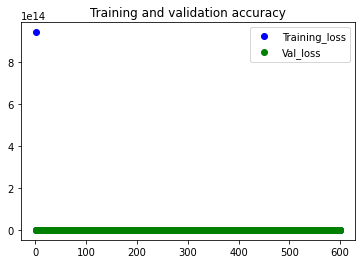

In [282]:
model.plot_cost()

# Next steps
---

whoop